<a href="https://colab.research.google.com/github/YeongChaeYun7/OpenCV/blob/main/OpenCV%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC_02_%EC%98%81%EC%83%81%EC%9D%98_%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab.patches import cv2_imshow 
from google.colab import drive 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 영상의 색상 표현 방법

컴퓨터에서는 주로 Red, Green, Blue 빛의 3원색을 가산조합한 RGB모델로 영상 표현

이외에도 CMY(프린터 인쇄에 사용), HSV(색상, 채도, 명도 다룸), YIQ,YCrCb(TV방송에 쓰임) 등이 있다


# RGB 색상 모델

RGB 영상을 R,G,B 채널로 분리

영상은 기본적으로 픽셀 1개가 24비트일때 8비트씩 BGR 순서로 구성

영상의 순서를 굳이 BGR에서 RGB로 변경하는 이유는 처리가 편하게하기 위해서이지 별다른 의미는 없다

이미지 크기 조정을 넣은 이유는
 plt.imshow는 해상도에따라 영상을 출력하기때문에

원본이 512 x 512 라고 결과 이미지도 같은 사이즈로 출력되지 않기 때문이다

출력시 목표 채널 외의 채널들은 0처리해서 목표 채널만 출력되게 한다


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


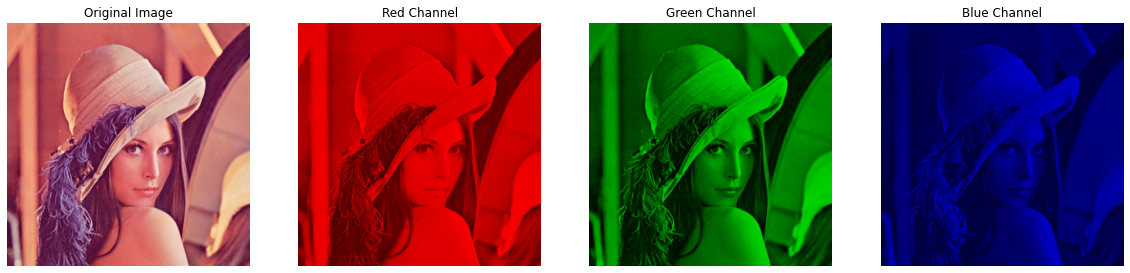

In [6]:
drive.mount('/content/gdrive') 
# 원본 영상
org_img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')

# BGR채널순서를 RGB채널로 변경, 채널 분할
RGB_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB) # cv2.cvtColor는 (높이, 너비, 채널)shape 배열로 변환
Red_img, Green_img, Blue_img = cv2.split(RGB_img)

# 화면 출력
plt.figure( figsize=(20,20) ) # 가시성을 위해 이미지 크기 확대

plt.subplot(1, 4, 1) # 배치를 위한 테이블과인덱스 지정. 1행 4열에서 1번째
#원본
plt.title("Original Image")
plt.imshow(RGB_img)

# R채널
RGB_img[:,:,0] = Red_img
RGB_img[:,:,1] = 0 # 다른 채널들을 0깂으로 설정해서 제외해줘야함
RGB_img[:,:,2] = 0 # 빈칸으로 두면 디폴트값인 영상크기(0:512)로 세팅
plt.axis("off")
plt.subplot(1, 4, 2) # 1행 4열에서 2번째
plt.title("Red Channel")
plt.imshow(RGB_img)

# G 채널
RGB_img[:,:,0] = 0
RGB_img[:,:,1] = Green_img
RGB_img[:,:,2] = 0
plt.axis("off") # 영상에 눈금을 없애기 위해 추가
plt.subplot(1, 4, 3) # 1행 4열에서 3번째
plt.title("Green Channel")
plt.imshow(RGB_img)

# B 채널
RGB_img[:,:,0] = 0
RGB_img[:,:,1] = 0
RGB_img[:,:,2] = Blue_img
plt.axis("off")
plt.subplot(1, 4, 4) # 1행 4열에서 4번째
plt.title("Blue Channel")
plt.imshow(RGB_img)
plt.axis("off") 
plt.show()

# HSV 색상 모델

RGB 색상 모델보다 인간이 인식하는 색상과 유사한 모델

각각 색상(Hue), 채도(Saturation), 명도(Value) 의미

\

HSV에서 색상은 원색을 나타내며 0 ~ 360도 각도로 표현

0°는 Red, 120°는 Green, 240°는 Blue

\
채도는 0 ~1 사이의 값으로 나타냄. 

0은 완전한 흰색이며 1이 순수한 원색이다

\
색의 밝기를 나타내는 명도도 0 ~ 1 사이의 값을 가짐

0이 검정, 1이 흰색을 나타낸다

RGB 영상을 H,S,V채널로 분리

RGB 채널 분리와 다르게 0,1,2 채널 전부  cv2.split으로 분리한 채널 설정

RGB_img를 처리하여 출력하기 때문에 위에서 처럼 0처리시키면 R,G,B 채널이 분리됨



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(500, 500, 3)


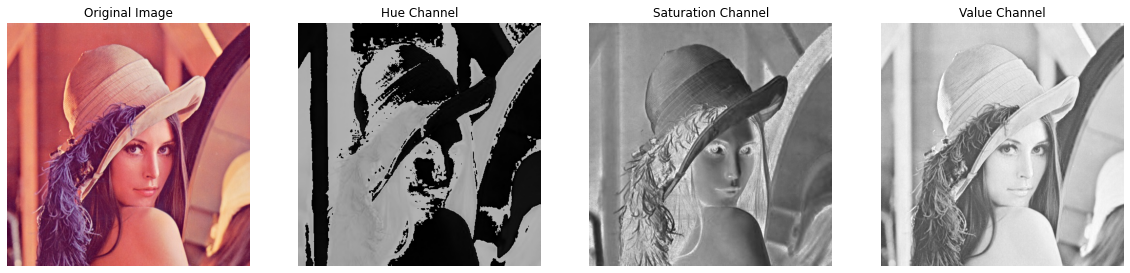

In [7]:
drive.mount('/content/gdrive') 
origin_img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')
# BGR채널 -> RGB채널 -> HSV채널 변경
RGB_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB) 
HSV_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2HSV) 
print(HSV_img.shape)
H_img, S_img, V_img = cv2.split(HSV_img)# H, S, V 채널로 8비트씩 나눔
plt.figure( figsize=(20,20) ) # 크기 조정

# 원본
plt.subplot(1, 4, 1) # 1행 4열에서 1번째
plt.title("Original Image")
plt.imshow(RGB_img)
plt.axis("off") # 영상에 눈금을 없애기 위해

# H
plt.subplot(1, 4, 2) # 1행 4열에서 2번째 
RGB_img[:,:,0] = H_img 
RGB_img[:,:,1] = H_img
RGB_img[:,:,2] = H_img
plt.title("Hue Channel")
plt.imshow(RGB_img)
plt.axis("off")

# S
plt.subplot(1, 4, 3) # 1행 4열에서 3번째 
RGB_img[:,:,0] = S_img
RGB_img[:,:,1] = S_img
RGB_img[:,:,2] = S_img
plt.title("Saturation Channel")
plt.imshow(RGB_img)
plt.axis("off")

# V
plt.subplot(1, 4, 4) # 1행 4열에서 4번째 
RGB_img[:,:,0] = V_img
RGB_img[:,:,1] = V_img
RGB_img[:,:,2] = V_img
plt.title("Value Channel")
plt.imshow(RGB_img)
plt.axis("off")
plt.show()

cv2.COLOR_RGB2HSV로 처리한 HSV 영상을 그대로 출력할 경우, 
기대하는 출력값이 나오지않음.

분리한 H, S, V를 따로 출력해도 아래와 같은 결과가 나온다.

출력시 RGB 이미지에 R,G,B 각 채널에 각각의 HSV채널을 적용하여 출력하여야 함



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


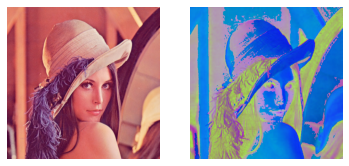

In [8]:
drive.mount('/content/gdrive')
origin_img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')
# BGR채널 -> RGB채널 -> HSV채널 변경
RGB_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB) 
HSV_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2HSV) 
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(HSV_img)
plt.axis("off")
plt.show()

# YCbCr 색상 모델

YCbCr은 영상 시스템에서 사용되는 색공간의 일종.(위키백과)
MPEG(동영상 압축 표준), JPEG(정지영상 압축 표준)에서 많이 활용

휘도 성분인 Y와 색차 성분인 Cr, Cb로 나눌 수 있다

\
Y는 휘도(luminace,광원의 단위 면적당의 광도) 성분

Cr 색차 성분으로 색상의 붉은 정도 나타냄

Cb 색차 성분으로 색상의 푸른 정도 나타냄

\
RGB -> YCbCr 변환 공식

Y = 0.29900*(R) + 0.58700*(G) + 0.11400*(B)

Cb = 0.50000*(R) - 0.41869*(G) + 0.08131*(B)

Cr = 0.168074*(R) - 0.33126*(G) + 0.50000*(B)

\
YCbCr ->  RGB 변환 공식

RGB 영상을 H,S,V채널로 분리


OpenCV에서 YCbCr로 채널 변환을 지원해주기에 cv2.COLOR_RGB2YCrCb를 사용하여 분리함

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


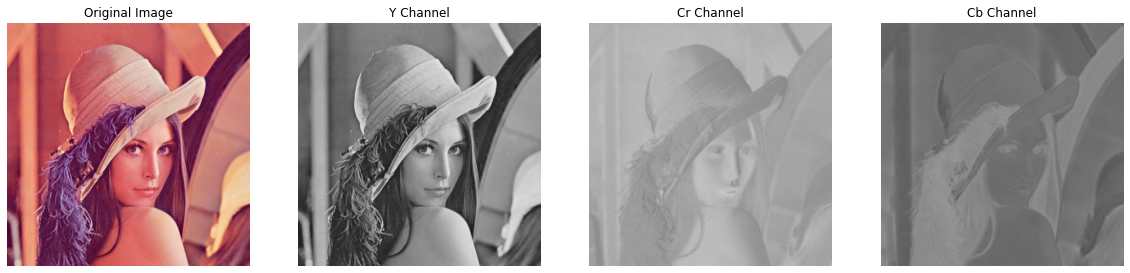

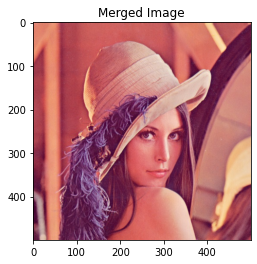

In [9]:
drive.mount('/content/gdrive') 
org_img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')
# BGR채널 -> RGB채널 -> YCbCr채널 변경
RGB_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB) 
YCrCb_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2YCrCb) 
Y_img, Cr_img, Cb_img = cv2.split(YCrCb_img) # YCbCr 채널로 나누기

plt.figure( figsize=(20,20) ) # 영상 크기 조정
plt.subplot(1, 4, 1) # 1행 4열에서 1번째
plt.title("Original Image")
plt.imshow(RGB_img)
plt.axis("off")

plt.subplot(1, 4, 2) # 1행 4열에서 2번째
RGB_img[:,:,0] = Y_img
RGB_img[:,:,1] = Y_img
RGB_img[:,:,2] = Y_img
plt.title("Y Channel")
plt.imshow(RGB_img)
plt.axis("off")

plt.subplot(1, 4, 3) # 1행 4열에서 3번째
RGB_img[:,:,0] = Cr_img
RGB_img[:,:,1] = Cr_img
RGB_img[:,:,2] = Cr_img
plt.title("Cr Channel")
plt.imshow(RGB_img)
plt.axis("off")

plt.subplot(1, 4, 4) # 1행 4열에서 4번째
RGB_img[:,:,0] = Cb_img
RGB_img[:,:,1] = Cb_img
RGB_img[:,:,2] = Cb_img
plt.title("Cb Channel")
plt.imshow(RGB_img)
plt.axis("off")
plt.show()

# 병합 영상
YCrCb_img=cv2.merge((Y_img,Cr_img,Cb_img)) # 나눠진 채널을 원영상으로 병합
RGB_img = cv2.cvtColor(YCrCb_img, cv2.COLOR_YCrCb2RGB) 
plt.title("Merged Image")
plt.imshow(RGB_img)

# YIQ 색상 모델

NTSC TV표준에서 사용하는 색상표현 방식

각각 Y(휘도, luminace), I(Orange-Blue 색상정보), Q(Puple-Green 색상정보)를 뜻함

\
RGB -> YIQ 변환 공식

Y = 0.299*(R) + 0.587*(G) + 0.114*(B)

I = 0.596*(R) - 0.275*(G) + 0.321*(B)

Q = 0.212*(R) - 0.523*(G) + 0.311*(B)

\
YCbCr와 YIQ의 변환 공식에서 Y는 둘 다 휘도를 뜻하기에 공식도 동일

\
OpenCV에서 YIQ의 채널 변환은 지원이 안되는것 같아 손코딩을 해야한다

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


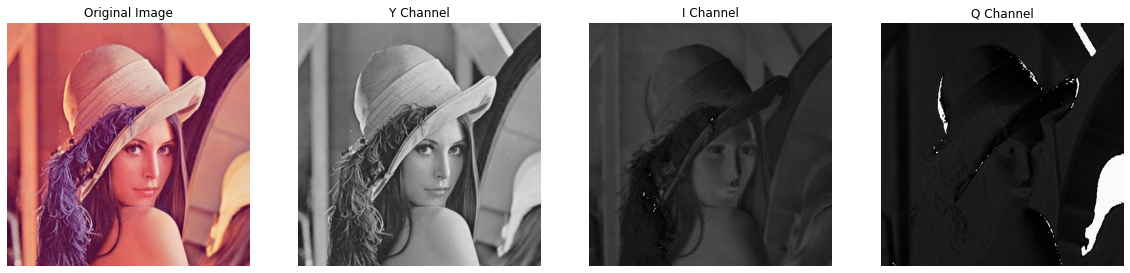

In [12]:
drive.mount('/content/gdrive') 
origin_img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')
# BGR -> RGB채널
RGB_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB) 
R_img,G_img,B_img=cv2.split(RGB_img)# R, G, B 분할

# Y, I, Q 각각의 파일 생성 + 0 초기화. 빈 캔버스를 만드는 과정
Y_img=np.zeros((RGB_img.shape[0],RGB_img.shape[1]),dtype=np.float64) # 소수점 연산때문에 float64 형식씀
I_img=np.zeros((RGB_img.shape[0],RGB_img.shape[1]),dtype=np.float64)
Q_img=np.zeros((RGB_img.shape[0],RGB_img.shape[1]),dtype=np.float64)

# 채널의 각 픽셀값 계산. 위의 변환 공식 적용
for h in range(RGB_img.shape[0]):
  for w in range(RGB_img.shape[1]):
    Y_img[h,w]=0.299*R_img[h,w]+0.587*G_img[h,w]+0.114*B_img[h,w]
    I_img[h,w]=0.596*R_img[h,w]-0.275*G_img[h,w]-0.321*B_img[h,w]
    Q_img[h,w]=0.212*R_img[h,w]-0.523*G_img[h,w]+0.311*B_img[h,w]

plt.figure(figsize=(20,20)) # 영상 크기 조정

plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(RGB_img)
plt.axis("off")

# Y
plt.subplot(1,4,2)
RGB_img[:,:,0]=Y_img
RGB_img[:,:,1]=Y_img
RGB_img[:,:,2]=Y_img
plt.title("Y Channel")
plt.imshow(RGB_img)
plt.axis("off")

# I
plt.subplot(1,4,3)
RGB_img[:,:,0]=I_img
RGB_img[:,:,1]=I_img
RGB_img[:,:,2]=I_img
plt.title("I Channel")
plt.imshow(RGB_img)
plt.axis("off")

# Q
plt.subplot(1,4,4)
RGB_img[:,:,0]=Q_img
RGB_img[:,:,1]=Q_img
RGB_img[:,:,2]=Q_img
plt.title("Q Channel")
plt.imshow(RGB_img)
plt.axis("off")
plt.show()